In [2]:
import sympy as sp
from scipy import *
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd
from sympy import Rational as R

# Assignment 1

In [ ]:
# a)
# i. True
# ii. False
# iii.True. In fact these are equivalent conditions.
# iv. False. This would mean the eigenvectors form a line, but it could be a plane or higher dimensional.
# v. False. A^3 = PD^3P^-1
# vi. False. It might be diagonalizable and it might not be.
# vii. True
# viii. True
# ix. False
# x. False. It would be true with the condition that v != 0.

<div>
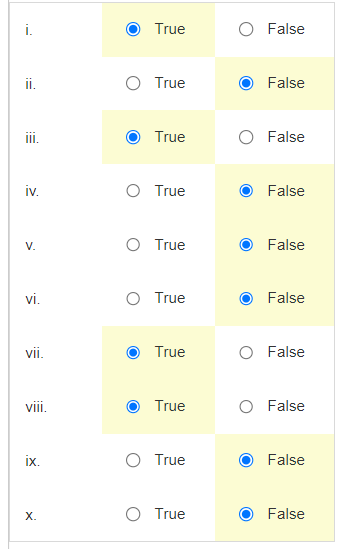
</div>

In [3]:
# b
b = symbols('b')
solve(3*b*4*3 - 72, b)

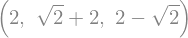

In [4]:
# c)
# Symmetric matrix so l1 + l2 + l3 = sum of diagonal (called trace) = 6
l1, l2, l3 = symbols('λ₁ λ₂ λ₃')
l2 = l1+sqrt(l1)
l3 = l1 - sqrt(l1)

x1 = solve(l1 + l2+ l3  - 6, l1)[0]
x2 = l2.subs(l1, x1)
x3 = l3.subs(l1, x1)

x1, x2, x3

# Assignment 2

In [23]:
# a)
p, q = symbols('p q')
A = Matrix([[1,3],[-2,-8]])
A2 = A**2
res = A2 - p* A-q * eye(2)
p = solve(res[0,-1], p)[0]
q = solve(-p-q-5, q)[0]
display(Math(r'p = ' + latex(p) + r'\text{ and } q = ' + latex(q)))

<IPython.core.display.Math object>

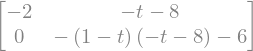

In [24]:
# b)
t = symbols('t')
B = A-t*eye(2)
B.echelon_form()

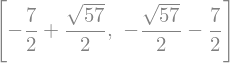

In [25]:
solve(B.echelon_form()[-1,-1], t)

In [ ]:
# c) Eigenvalues

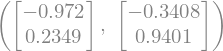

In [28]:
# d)

A.eigenvects()[0][2][0].normalized().evalf(4), A.eigenvects()[1][2][0].normalized().evalf(4)


# Assignment 3

In [29]:
h = symbols('h')
solve(Matrix([[-1, 4, 10], [-4, 5, 7], [3, 0, h+3]]).echelon_form()[-1,-1], h)[0]

# Assignment 4

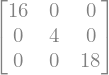

In [31]:
# a)

v1 = Matrix([[2],[2],[-2],[-2]])
v2 = Matrix([[1],[-1],[1],[-1]])
v3 = Matrix([[0],[3],[3],[0]])
x = Matrix([[0],[1],[2],[3]])

V = Matrix.hstack(v1, v2, v3)
G = V.T * V
G

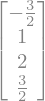

In [32]:
# b)
proj = x.project(v1) + x.project(v2) + x.project(v3)
proj

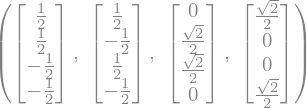

In [33]:
# c)
v4 = x - proj
v1.normalized(), v2.normalized(), v3.normalized(), v4.normalized()

# Assignment 5

In [35]:
# a)
k = symbols('k')
A = Matrix([[1,3,0],[1,1,1],[4,1,1]])
B = Matrix([[2,5,3],[1,1,2],[4,0,1]])
C = Matrix([[1,1,3],[3,2,1],[0,1,2]])
D = Matrix([[3,1,k],[3*k,k,2*k],[9,3,3*k]])

X2 = (A+B)**-1*C
detX = sqrt(det(X2))
detX

In [48]:
# b)
Y = D.T * D
Y.trace()

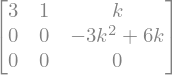

In [36]:
# c)
D.echelon_form()

In [37]:
solve(D.echelon_form()[1,-1], k)

# Assignment 6

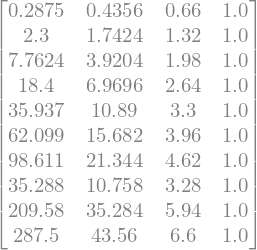

In [51]:
# a)

x = np.array([0.66, 1.32, 1.98, 2.64, 3.3, 3.96, 4.62, 3.28, 5.94, 6.6])
y = np.array([7.32, 12.22, 16.34, 23.66, 28.06, 33.39, 34.12, 39.21, 44.21, 47.48])

X = Matrix.hstack(Matrix(x**3), Matrix(x**2), Matrix(x), ones(len(x), 1))
X.evalf(5)

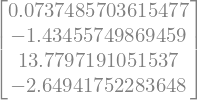

In [52]:
# b)
B = Matrix.hstack(X.T * X, X.T * Matrix(y)).rref()[0][:,-1]
B

In [64]:
round((Matrix(y)-X*B).norm(), 2)

In [63]:
# d)
def f(t): return B[0]*t**3+B[1]*t**2 + B[2]*t + B[3]
round(f(8), 2)

# Assignment 7

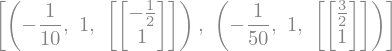

In [65]:
a = 5
b = 3
c = a+b
d = a

A = 200
B = 100

Y = Matrix([[-R(c,A), R(b,B)], [R(c,A), -R((b+d),B)]])
Y.eigenvects()

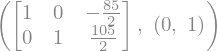

In [66]:
l1 = Y.eigenvects()[0][0]
l2 = Y.eigenvects()[1][0]
v1 = Y.eigenvects()[0][2][0]
v2 = Y.eigenvects()[1][2][0]

y0 = Matrix([100, 10])

Matrix.hstack(v1, v2, y0).rref()

In [67]:
c1 = Matrix.hstack(v1, v2, y0).rref()[0][0,-1]
c2 = Matrix.hstack(v1, v2, y0).rref()[0][1,-1]

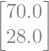

In [73]:
def y(t): return c1*v1*exp(t*l1) + c2*v2*exp(t*l2)
y(11).evalf(2)